In [19]:
from pathlib import Path
import librosa
import torch
from argparse import ArgumentParser
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import h5py
import tqdm
from IPython.display import Audio, display

import numpy as np

import sys
sys.path += ['../music-translation/src']

import utils
import wavenet_models
from utils import save_audio
from wavenet import WaveNet
from wavenet_generator import WavenetGenerator
from nv_wavenet_generator import NVWavenetGenerator
from nv_wavenet_generator import Impl

In [20]:
encoded = []
for directory in Path('encoded-musicnet/encoded').iterdir():
    for path in directory.iterdir():
        encoded += [torch.load(path)]
encoded = torch.cat(encoded, dim=0)

torch.Size([203])
torch.Size([12800, 203])


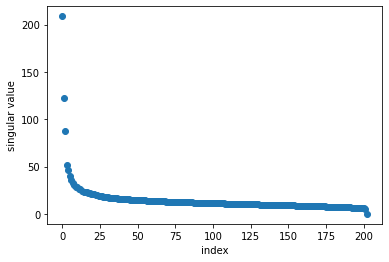

In [32]:
flattened = torch.flatten(encoded, 1)
col_means = torch.mean(flattened, 0)
demeaned = flattened - col_means
U, S, V = torch.svd(demeaned, compute_uv = True)
print(S.shape)
print(V.shape)

plt.scatter([i for i in range(203)], S.cpu().numpy())
plt.xlabel("index")
plt.ylabel("singular value")
plt.show()